# Labsheet 4

## Regression modelling, regression model tuning, includes svr, linear_regression, stochastic gradient descent regressor, random forrest regressor and bagging regressor.

name: Theoridho Andily
id: 22764884

# Project 1

The parameter tuning for the random forrest regressor is the longest running time which will take some time and it is using all core as n_jobs = -1.

## Data Preprocessing

In [331]:
import pandas as pd

slump = pd.read_csv('slump_test.data', sep=',', header=0, index_col=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7,10])

### Data Visualisation

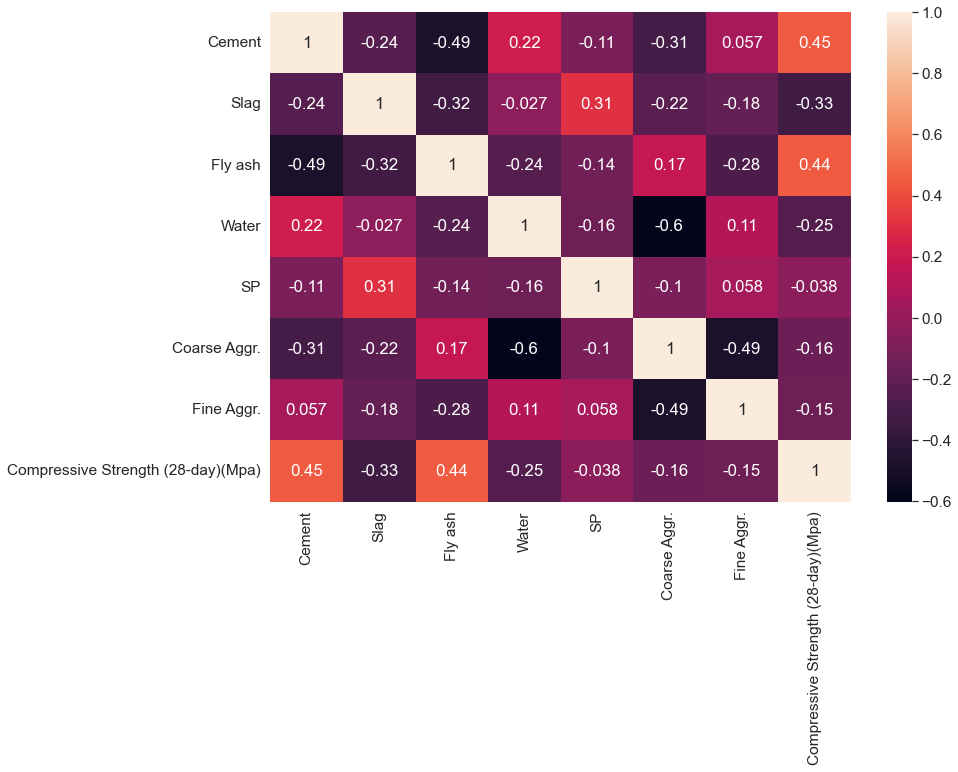

In [332]:
import seaborn as sn
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (13, 9))
correlation_matrix = slump.corr()
sn.heatmap(correlation_matrix, annot=True)
sn.set(font_scale=1.4)
plt.show()

Looking at the correlation matrix there there is a weak positive relation between Compressive Strength with cement and fly ash. There is a weak negative relation between the slag and water to the Compressive strength. Then there is a very weak relation between the coarse aggr, fine aggr and SP with the Compressive Strength. Since the Coarse Aggr andFine Aggr have very weak correlations they can be removed.

In [333]:
slump.drop('Coarse Aggr.', inplace=True, axis=1)
slump.drop('Fine Aggr.', inplace=True, axis=1)

C:\Users\theor\AppData\Local\Temp/ipykernel_16500/2568244499.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  slump.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Cement'}>,
        <AxesSubplot:title={'center':'Slag'}>],
       [<AxesSubplot:title={'center':'Fly ash'}>,
        <AxesSubplot:title={'center':'Water'}>],
       [<AxesSubplot:title={'center':'SP'}>,
        <AxesSubplot:title={'center':'Compressive Strength (28-day)(Mpa)'}>]],
      dtype=object)

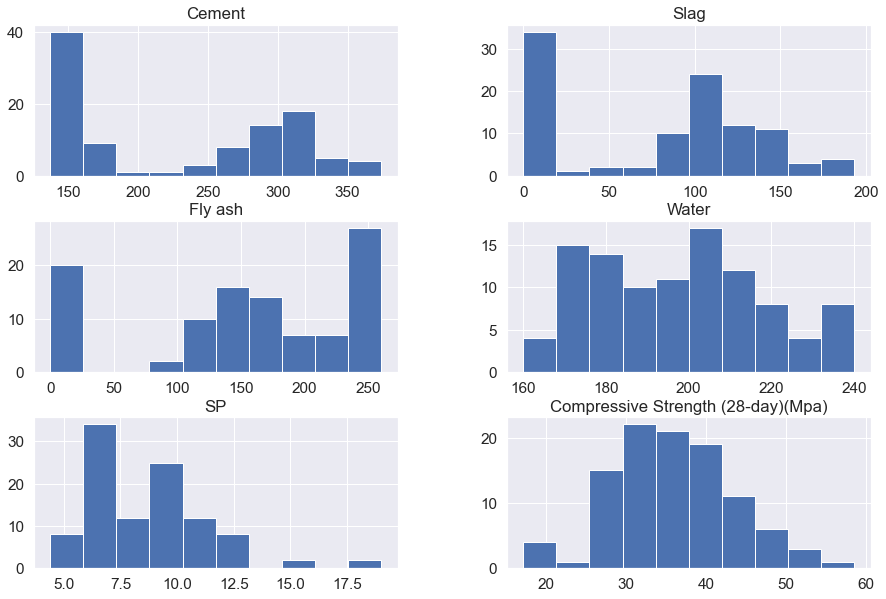

In [334]:
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
slump.hist(ax = ax)

After looking at the histogram, there is a large number of Slag and Fly ash with the value of 0f 0 but the Cement, Slag, Fly ash, Coarse Aggr values closely follows a standard curve. The SP, Fine Aggr and Compressive Strength has a right skewed data where the mean is less than the median and the median is less than the mode. The Water instance is almost a rectangular pattern if the data was averaged.

<AxesSubplot:title={'center':'Features instance of the data and their corresponding averages'}, xlabel='No'>

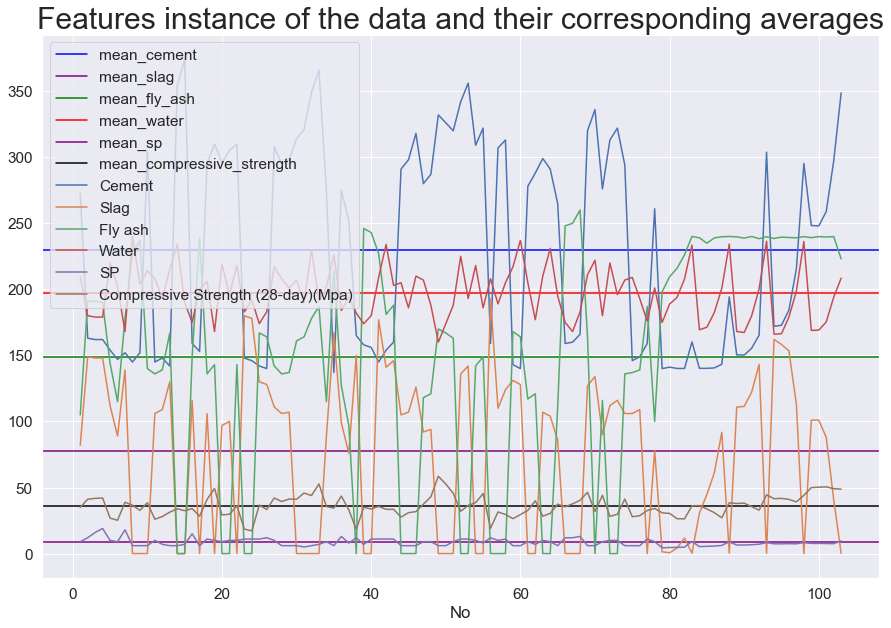

In [335]:
fig = plt.figure(figsize = (15, 10))
plt.title('Features instance of the data and their corresponding averages', fontdict={'fontsize': 30})
ax = fig.gca()
mean_cement = slump['Cement'].mean()
mean_slag = slump['Slag'].mean()
mean_fly_ash = slump['Fly ash'].mean()
mean_water = slump['Water'].mean()
mean_sp = slump['SP'].mean()
mean_compressive_strength = slump['Compressive Strength (28-day)(Mpa)'].mean()
ax.axhline(mean_cement, color='blue', label='mean_cement')
ax.axhline(mean_slag, color='purple', label='mean_slag')
ax.axhline(mean_fly_ash, color='green', label='mean_fly_ash')
ax.axhline(mean_water, color='red', label='mean_water')
ax.axhline(mean_sp, color='purple', label='mean_sp')
ax.axhline(mean_compressive_strength, color='black', label='mean_compressive_strength')
ax.legend()
slump.plot.line(ax = ax)

This graphs shows the distinct mean of each features and how the cement has the highest mean compared with slag with the lowest mean. The cement feature has the highest global maxima and there are lots of 0s in the slag which could cause such difference in mean.

In [336]:
slump.describe()

,Cement,Slag,Fly ash,Water,SP,Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,58.530000


In [337]:
from sklearn.model_selection import train_test_split

# Split 80/20 train/test
slump_columns  = slump.columns
x_train, x_test, y_train, y_test = train_test_split(slump[slump.columns[:-1]], slump[slump.columns[-1]], test_size=0.2, random_state=42)

In [338]:
train_slump = x_train
train_slump[slump_columns[-1]] = y_train
test_slump = x_test
test_slump[slump_columns[-1]] = y_test

In [339]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [340]:
sklearn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),                   # Just in case of missing data
    ('std_scaler', StandardScaler()),
])

train_transformed_slump = sklearn_pipeline.fit_transform(train_slump)
test_transformed_slump = sklearn_pipeline.fit_transform(test_slump)

In [341]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

The next part are the regressor, prediction and scoring, where each models specified in the lab sheets are build, fitted and tuned. LinearSVR and Stochastic gradient descent regressor both have important parameters that can be tuned to increase the accuracy of the model similar to classifications models where as the linear regressor model does not have any parameters that can be tuned to increase the accuracy. In each regressor I used a for loop to test each variables from the list though it does not work with all type of variables especially for LinearSVR and linearSDGR. If the wrong values are tested in the loop, it can have a convergence error. Each parameter tuning uses the score class function based on the regressor model and it is basically using the coefficient of determination also known as R<sup>2</sup> . Generally the higher the R<sup>2</sup> the better the regressor follows the true value which leads to a better accuracy. Since I used the R<sup>2</sup> which works well in one test set but could give different score on a different test set but the labsheet did not clarify which scoring functions to be used. The only downside of using one test set is overfitting.

## Linear SVM Regressor

### Parameter Tuning

In [342]:
C = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4]
tol = [1e-2, 1e-3, 1e-4, 1e-5]
loss = ['epsilon_insensitive', 'squared_epsilon_insensitive']
best = [0, 0, '']
score = 0

for regularisation in C:
    for tolerance in tol:
        for losses in loss:
            reg_linear_SVM = LinearSVR(random_state=42, tol=tolerance, C=regularisation, loss=losses)
            reg_linear_SVM.fit(train_transformed_slump[:, :-1], train_transformed_slump[:, -1])
            temp_score = reg_linear_SVM.score(test_transformed_slump[:, :-1], test_transformed_slump[:, -1])
            if score < temp_score:
                best[0] = regularisation
                best[1] = tolerance
                best[2] = losses
                score = temp_score

print('Best parameters: ')
print('C:', best[0])
print('tol:', best[1])
print('loss:', best[2])
print('Score: ', round(score, 4))

Best parameters: 
C: 0.3
tol: 0.01
loss: squared_epsilon_insensitive
Score:  0.8683


In [343]:
reg_linear_svm = LinearSVR(random_state=42, C=0.3, tol=0.01, loss='squared_epsilon_insensitive')
reg_linear_svm.fit(train_transformed_slump[:, :-1], train_transformed_slump[:, -1])
predicted_linear_svm = reg_linear_svm.predict(test_transformed_slump[:, :-1])

## Linear Regression

In [344]:
reg_linear = LinearRegression()
reg_linear.fit(train_transformed_slump[:, :-1], train_transformed_slump[:, -1])
predicted_linear = reg_linear.predict(test_transformed_slump[:, :-1])
score = reg_linear.score(test_transformed_slump[:, :-1], test_transformed_slump[:, -1])
print('Score: ', round(score, 4))

Score:  0.8656


## Stochastic Gradient Descent Regression

### Parameter Tuning

In [345]:
alpha = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]
tol = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epsilon = [0.01, 0.05, 0.1, 0.5, 1]
best = [0, 0, 0]
score = 0

for regularisation in C:
    for tolerance in tol:
        for ep in epsilon:
            reg_SGDR = SGDRegressor(random_state=42, tol=tolerance, alpha=regularisation, epsilon=ep)
            reg_SGDR.fit(train_transformed_slump[:, :-1], train_transformed_slump[:, -1])
            temp_score = reg_SGDR.score(test_transformed_slump[:, :-1], test_transformed_slump[:, -1])
            if score < temp_score:
                best[0] = regularisation
                best[1] = tolerance
                best[2] = ep
                score = temp_score
            
print('Best parameters: ')
print('alpha:', best[0])
print('tol:', best[1])
print('epsilon:', best[2])
print('Score: ', round(score, 4))

Best parameters: 
alpha: 0.01
tol: 0.0001
epsilon: 0.01
Score:  0.8688


In [346]:
reg_SGDR = SGDRegressor(random_state=42, tol=0.0001, alpha=0.01, epsilon=0.01)
reg_SGDR.fit(train_transformed_slump[:, :-1], train_transformed_slump[:, -1])
predicted_SDGR = reg_SGDR.predict(test_transformed_slump[:, :-1])

## Voting Regressor

In [347]:
from sklearn.ensemble import VotingRegressor

In [348]:
ensemble_learning = VotingRegressor([('linearR', reg_linear), ('linearSVR', reg_linear_svm), ('SGDR', reg_SGDR)])

In [349]:
ensemble_learning.fit(train_transformed_slump[:, :-1], train_transformed_slump[:, -1])

VotingRegressor(estimators=[('linearR', LinearRegression()),
                            ('linearSVR',
                             LinearSVR(C=0.3,
                                       loss='squared_epsilon_insensitive',
                                       random_state=42, tol=0.01)),
                            ('SGDR',
                             SGDRegressor(alpha=0.01, epsilon=0.01,
                                          random_state=42, tol=0.0001))])

In [350]:
predicted_voting = ensemble_learning.predict(test_transformed_slump[:, :-1])

In [351]:
print('Score: ', ensemble_learning.score(test_transformed_slump[:, :-1], test_transformed_slump[:, -1]))

Score:  0.8684337744641162


## RSME Comparison

In [352]:
from sklearn.metrics import mean_squared_error
import math
print('RMSE value for voting regressor: ', round(math.sqrt(mean_squared_error(predicted_voting, test_transformed_slump[:, -1])), 4))
print('RMSE value for linear regressor: ', round(math.sqrt(mean_squared_error(predicted_SDGR, test_transformed_slump[:, -1])), 4))
print('RMSE value for linear svm regressor: ', round(math.sqrt(mean_squared_error(predicted_linear_svm, test_transformed_slump[:, -1])), 4))
print('RMSE value for stochastic gradient descent regressor: ', round(math.sqrt(mean_squared_error(predicted_linear, test_transformed_slump[:, -1])), 4))

RMSE value for voting regressor:  0.3627
RMSE value for linear regressor:  0.3622
RMSE value for linear svm regressor:  0.3629
RMSE value for stochastic gradient descent regressor:  0.3666


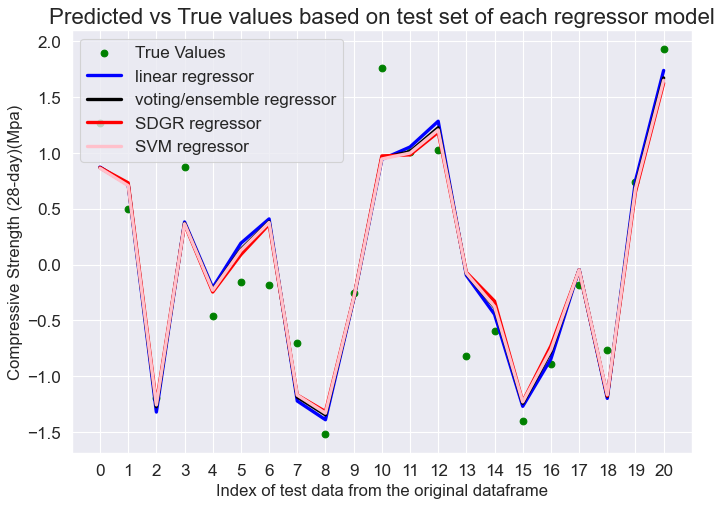

In [353]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


figure(figsize=(10, 7), dpi=80)
plt.title('Predicted vs True values based on test set of each regressor model', fontdict={'fontsize': 20})
x = np.arange(0, len(test_transformed_slump[:, -1]))
plt.scatter(x, test_transformed_slump[:, -1],color='green', label='True Values')
plt.plot(x, predicted_linear ,color='blue', linewidth=3, label='linear regressor')
plt.plot(x, predicted_voting ,color='black', linewidth=3, label='voting/ensemble regressor')
plt.plot(x, predicted_SDGR ,color='red', linewidth=3, label='SDGR regressor')
plt.plot(x, predicted_linear_svm ,color='pink', linewidth=3, label='SVM regressor')

plt.xticks(x)
plt.ylabel('Compressive Strength (28-day)(Mpa)', fontsize=15)
plt.xlabel("Index of test data from the original dataframe", fontsize=15)
plt.legend()
plt.show()


The graph shows that the predictor manage to find a pattern closely follows the true values and each regressor are very similar except for the linear regressor it sometimes goes slightly higher or lower than the other regressor.

# Project 2

## Data Preprocessing

In [354]:
abalone = pd.read_csv('abalone.data', header=None)

### Converting categorical data to numerical

In [355]:
print(abalone[0].unique())

['M' 'F' 'I']


In [356]:
abalone[0] = abalone[0].str.strip()
abalone[0] = abalone[0].str.replace('M', '0')
abalone[0] = abalone[0].str.replace('F', '1')
abalone[0] = abalone[0].str.replace('I', '2')

In [357]:
abalone[0] = pd.to_numeric(abalone[0])

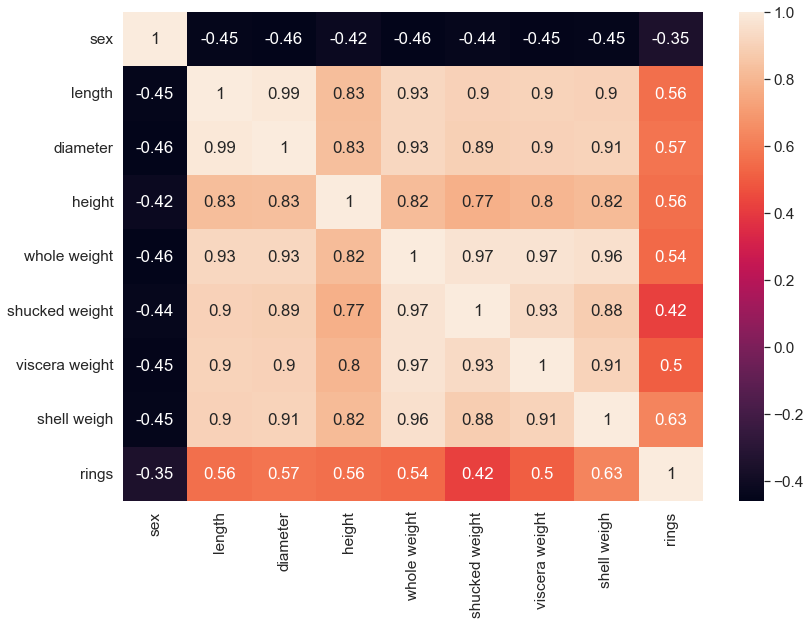

In [358]:
fig = plt.figure(figsize = (13, 9))
abalone_copy = abalone.copy()
abalone_copy = abalone.rename({ 0: 'sex', 1: 'length', 2: 'diameter',3:'height', 4: 'whole weight', 5: 'shucked weight', 6: 'viscera weight', 7: 'shell weigh',8: 'rings' },axis=1)
correlation_matrix = abalone_copy.corr()
sn.heatmap(correlation_matrix, annot=True)
sn.set(font_scale=1.4)
plt.show()

Looking at the correlation matrix, there is a strong between most of the features except for sex and rings. The correlations between the the features and the predictor variable is a medium positive correlation. The sex feature mainly shows a weak negative correlations which is a strong reason to remove it.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>]], dtype=object)

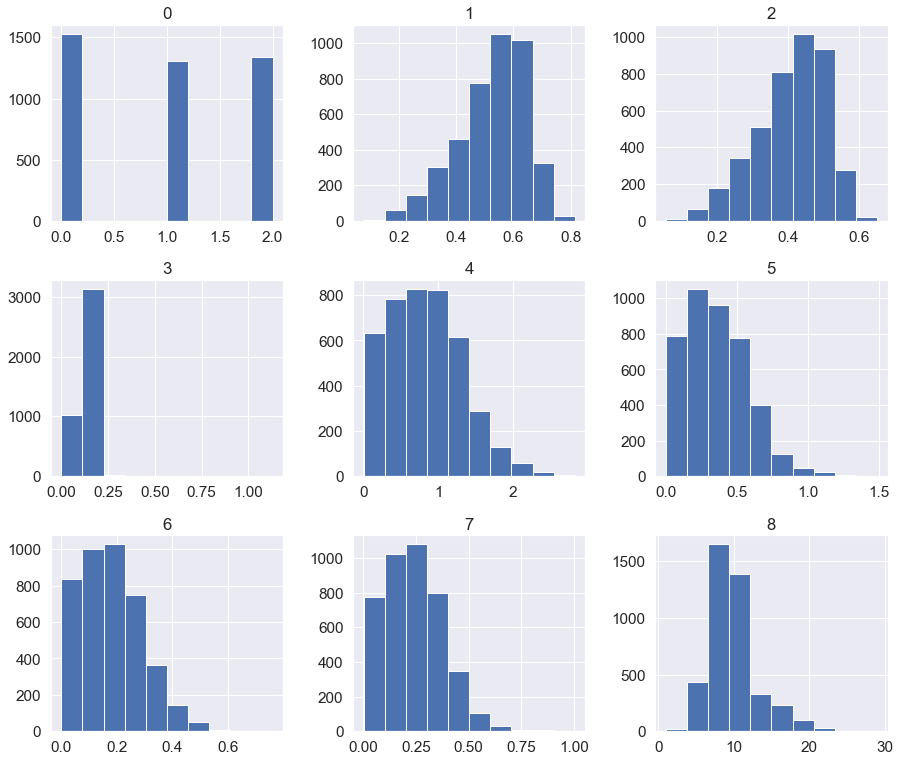

In [359]:
abalone.hist(figsize = (15,13))

These histogram corresponds to the attribute from the data set. Hist 0 = sex, hist 1 = length, hist 2 = diameter, hist 3 = height, hist 4 = whole weight, hist 5 = shucked weight, hist 6 = viscera weight, hist 7 = shell weight and hist 8 = rings. The length and diameter has a left skewed data which mean the mean is lower than the median and the median is lower than the mode. The whole weight, shucked weight and rings have a right skewed data which has been explained in project 1. The height can be categorised into three classes as it has only three columns. The sex obviously has three distinct class which are male, female and infant where male is converted to 0, female to 1 and infant to 2. There are more males than females and more infant than females.

In [360]:
abalone_columns  = abalone.columns
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(abalone[abalone.columns[:-1]], abalone[abalone.columns[-1]], test_size=0.15, random_state=42)

In [361]:
train_abalone = x_train_a
train_abalone[abalone_columns[-1]] = y_train_a
test_abalone = x_test_a
test_abalone[abalone_columns[-1]] = y_test_a

In [362]:
scaler =  StandardScaler()
imputer = SimpleImputer(strategy="median",add_indicator=True)

Below shows the scaling and other feature processing such as imputing.

In [363]:
train_transformed_abalone = imputer.fit_transform(train_abalone)
train_transformed_abalone = scaler.fit_transform(train_transformed_abalone)
test_transformed_abalone = imputer.fit_transform(test_abalone)
test_transformed_abalone = scaler.fit_transform(test_transformed_abalone)

## Random Forrest Regressor

In [364]:
from sklearn.ensemble import RandomForestRegressor

## Parameter Tuning

In [365]:
max_features = ['auto', 'sqrt', 'log2', 0.9]
min_sample_leaf = [1, 2, 10, 50, 82]
max_samples = [5, 10, 40, 82]
best = [0, 0, 0]
score = 0

for features in max_features:
    for leaf_size in min_sample_leaf:
        for sample in max_samples:
            reg_random_forrest = RandomForestRegressor(n_estimators=500, bootstrap=True, max_features=features, min_samples_leaf=leaf_size, max_samples=sample, n_jobs=-1, random_state=0)
            reg_random_forrest.fit(train_transformed_abalone[:, :-1], train_transformed_abalone[:, -1])
            temp_score = reg_random_forrest.score(test_transformed_abalone[:, :-1], test_transformed_abalone[:, -1])
            if score < temp_score:
                best[0] = features
                best[1] = leaf_size
                best[2] = sample
                score = temp_score

print('Best parameters: ')
print('max_features:', best[0])
print('min_sample_leaf:', best[1])
print('max_samples:', best[2])
print('Score: ', round(score, 4))

Best parameters: 
max_features: auto
min_sample_leaf: 1
max_samples: 82
Score:  0.5466


In this parameter tuning, the score is also based on R<sup>2</sup> as it gives a good score on a specified test data as it was not specified by the labsheet to perform cross validation scoring. The downside as previously mentioned in project 1 is that it will suit the specified test set only and will cause overfitting.

In [367]:
import numpy as np


# Create a prediction based on the test data set
predicted_random_forrest = reg_random_forrest.predict(test_transformed_abalone[:, :-1])

# Create a copy of the test abalone
new_test_abalone = np.copy(test_transformed_abalone)
new_test_abalone[:, -1] = predicted_random_forrest

# Reverse the predicted abalone to get the predicted rings as integers
predicted_random_forrest_reversed = scaler.inverse_transform(new_test_abalone)
predicted_random_forrest_reversed = imputer.inverse_transform(predicted_random_forrest_reversed)

# Reverse the true abalone to get the original rings as integers
test_abalone_reversed = scaler.inverse_transform(test_transformed_abalone)
test_abalone_reversed = imputer.inverse_transform(test_abalone_reversed)

print('RMSE value for random forrest using original values: ', round(math.sqrt(mean_squared_error(predicted_random_forrest_reversed[:, -1].astype(int), test_abalone_reversed[:, -1].astype(int))), 4))
RMSE_RF1 = round(math.sqrt(mean_squared_error(predicted_random_forrest_reversed[:, -1].astype(int), test_abalone_reversed[:, -1].astype(int))), 4)

RMSE value for random forrest using original values:  2.3273


In [368]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(reg_random_forrest, threshold=0.05).fit(train_transformed_abalone[:, :-1], train_transformed_abalone[:, -1])

In [369]:
feature_importance = selector.estimator_.feature_importances_
feature_names = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weigh']
print('Feature importance values: ')
for counter in range(len(feature_importance)):
    print(feature_names[counter], ':', round(feature_importance[counter], 4))

Feature importance values: 
sex : 0.0302
length : 0.0707
diameter : 0.0741
height : 0.141
whole weight : 0.072
shucked weight : 0.1203
viscera weight : 0.1053
shell weigh : 0.3865


As shown above the sex attribute is below the threshold of 0.05 and is not important for our random forrest and can be removed.

In [370]:
reg_random_forrest_new = RandomForestRegressor(n_estimators=500, bootstrap=True, max_features='auto', min_samples_leaf=1, max_samples=82, n_jobs=-1, random_state=0)
reg_random_forrest_new.fit(train_transformed_abalone[:, 1:-1], train_transformed_abalone[:, -1])

RandomForestRegressor(max_samples=82, n_estimators=500, n_jobs=-1,
                      random_state=0)

In [371]:
# Create a prediction based on the test data set
predicted_random_forrest = reg_random_forrest_new.predict(test_transformed_abalone[:, 1:-1])

# Create a copy of the test abalone
new_test_abalone = np.copy(test_transformed_abalone)
new_test_abalone[:, -1] = predicted_random_forrest

# Reverse the predicted abalone to get the predicted rings as integers
predicted_random_forrest_reversed_rf2 = scaler.inverse_transform(new_test_abalone)
predicted_random_forrest_reversed_rf2 = imputer.inverse_transform(predicted_random_forrest_reversed_rf2)

print('RMSE value for random forrest using original values: ', round(math.sqrt(mean_squared_error(predicted_random_forrest_reversed_rf2[:, -1].astype(int), test_abalone_reversed[:, -1].astype(int))), 4))
RMSE_RF2 = round(math.sqrt(mean_squared_error(predicted_random_forrest_reversed_rf2[:, -1].astype(int), test_abalone_reversed[:, -1].astype(int))), 4)

RMSE value for random forrest using original values:  2.3576


In [372]:
print('Difference in RMSE is', round((RMSE_RF2-RMSE_RF1), 4), 'which shows that the second random forrest has a higher RMSE and therefore a worse performance.')

Difference in RMSE is 0.0303 which shows that the second random forrest has a higher RMSE and therefore a worse performance.


Difference in mean between random forrest 1 prediction and true rings:  0.0017
Difference in mean between random forrest 2 prediction and true rings:  0.2958
Difference in mean between random forrest 1 prediction and random forrest 2 prediction:  0.2528


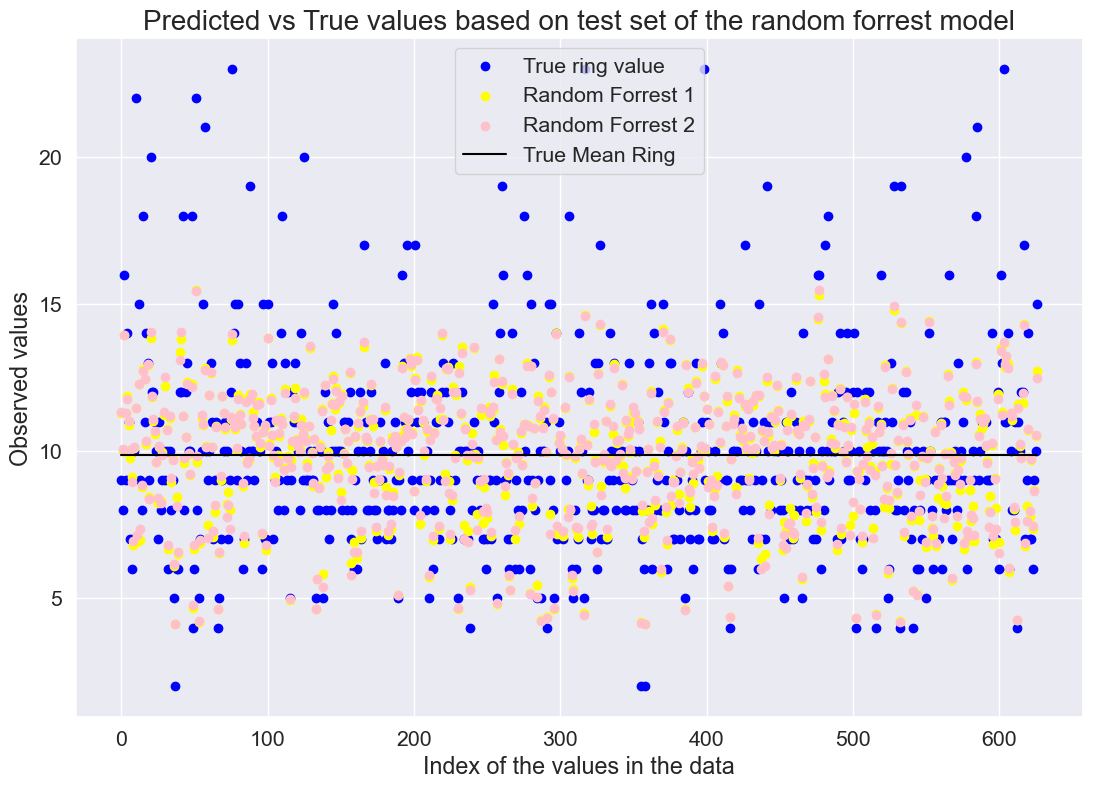

In [373]:
figure(figsize=(13, 9), dpi=100)
x = np.arange(0, len(test_transformed_abalone))
y_mean_true = [np.mean(test_abalone_reversed[:, -1].astype(int))] * len(test_abalone_reversed[:, -1])
y_mean_rf1 = [np.mean(predicted_random_forrest_reversed[:, -1])] * len(predicted_random_forrest_reversed[:, -1])
y_mean_rf2 =  [np.mean(predicted_random_forrest_reversed_rf2[:, -1].astype(int))] * len(predicted_random_forrest_reversed_rf2[:, -1])

plt.scatter(x, test_abalone_reversed[:, -1].astype(int), color='blue', label='True ring value')
plt.scatter(x, predicted_random_forrest_reversed[:, -1], color='yellow', label='Random Forrest 1')
plt.scatter(x, predicted_random_forrest_reversed_rf2[:, -1], color='pink', label='Random Forrest 2')

# Plot the average line
print('Difference in mean between random forrest 1 prediction and true rings: ', round((y_mean_true[0] - y_mean_rf1[0])**2, 4))
print('Difference in mean between random forrest 2 prediction and true rings: ', round((y_mean_true[0] - y_mean_rf2[0])**2, 4))
print('Difference in mean between random forrest 1 prediction and random forrest 2 prediction: ', round((y_mean_rf1[0] - y_mean_rf2[0])**2, 4))

# Since the mean are very similar, we can just print the true mean.
mean_line = plt.plot(x,y_mean_true, label='True Mean Ring', color='black')

plt.title('Predicted vs True values based on test set of the random forrest model', fontdict={'fontsize': 20})
plt.ylabel('Observed values')
plt.xlabel('Index of the values in the data')
plt.legend()
plt.show()

As we can see there is a very small difference between the mean from random forrest 1 and the true value, while there is a bigger mean difference between the second random forrest and the true value. There are values far beyond 15 in the true rings compared to both random forrest but there are more values in the 5 regions.

In [374]:
def mean_squared_error_unique(predicted):
    error_squared = (test_abalone_reversed[:, -1] - predicted) ** 2
    unique_test, indicesList = np.unique(test_abalone_reversed[:, -1].astype(int), return_index=True)
    zipped_test = np.array(list(zip(test_abalone_reversed[:, -1].astype(int), error_squared)))
    mean_errors = {}
    counter = 0
    for unique in unique_test:
        temp = []
        for values in zipped_test[:, :]:
            if unique in values:
                temp.append(values[1])
        mean_errors[unique] = temp
        counter += 1
    for key, value in mean_errors.items():
        mean_errors[key] = int(sum(value) / len(value))
    return mean_errors

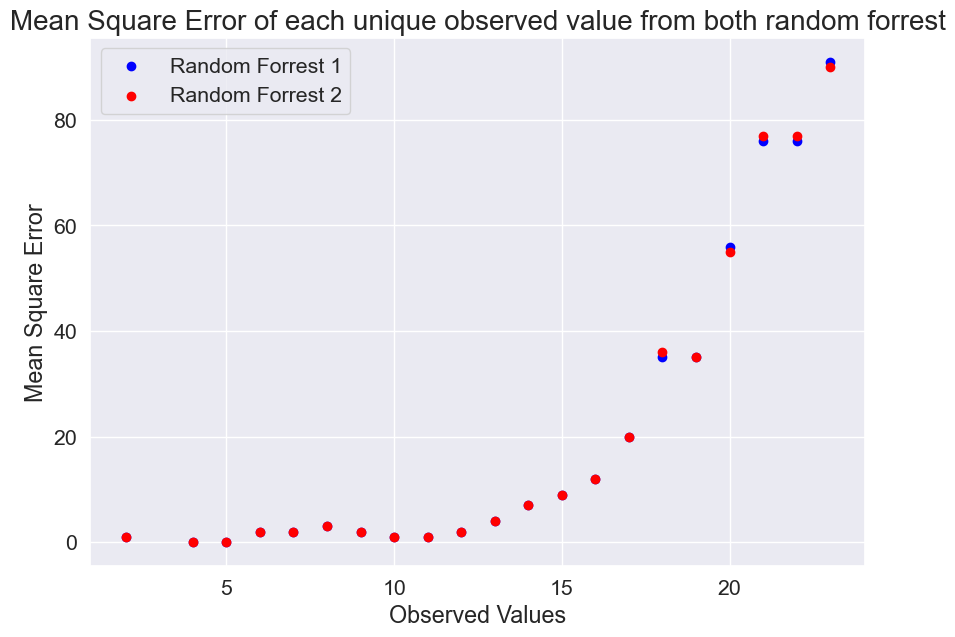

In [375]:
figure(figsize=(10, 7), dpi=100)
mean_errors_1 = mean_squared_error_unique(predicted_random_forrest_reversed[:, -1])
mean_errors_2 = mean_squared_error_unique(predicted_random_forrest_reversed_rf2[:, -1])
plt.scatter(mean_errors_1.keys(), mean_errors_1.values(), color='blue', label='Random Forrest 1')
plt.scatter(mean_errors_2.keys(), mean_errors_2.values(), color='red', label='Random Forrest 2')
plt.title('Mean Square Error of each unique observed value from both random forrest', fontdict={'fontsize': 20})
plt.ylabel('Mean Square Error')
plt.xlabel('Observed Values')
plt.legend()
plt.show()

From looking at the unique observed values, the mean square errors has a much steeper curve at the higher observed values while the lower observed values have much lower mean square error. The difference in the random forrest shows a slight distinction in the higher observed region and strong similarity in the lower observed region.

## Bagging regressor

In [376]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

In [377]:
bagging_regr = BaggingRegressor(base_estimator=SVR(kernel='linear', C=0.4, tol=0.0001), n_estimators=500, bootstrap=True, max_features=1, max_samples=82, random_state=0, n_jobs=-1).fit(train_transformed_abalone[:, :-1], train_transformed_abalone[:, -1])

In [378]:
# Create a prediction based on the test data set
predicted_bagging = bagging_regr.predict(test_transformed_abalone[:, :-1])

# Create a copy of the test abalone
new_test_abalone = np.copy(test_transformed_abalone)
new_test_abalone[:, -1] = predicted_bagging

# Reverse the predicted abalone to get the predicted rings as integers
predicted_bagging_reversed = scaler.inverse_transform(new_test_abalone)
predicted_bagging_reversed = imputer.inverse_transform(predicted_random_forrest_reversed)

# Reverse the true abalone to get the original rings as integers
test_abalone_reversed = scaler.inverse_transform(test_transformed_abalone)
test_abalone_reversed = imputer.inverse_transform(test_abalone_reversed)

print('RMSE value for bagging using original values: ', round(math.sqrt(mean_squared_error(predicted_bagging_reversed[:, -1].astype(int), test_abalone_reversed[:, -1].astype(int))), 4))
RMSE_bag = round(math.sqrt(mean_squared_error(predicted_bagging_reversed[:, -1].astype(int), test_abalone_reversed[:, -1].astype(int))), 4)

RMSE value for bagging using original values:  2.3273


In [379]:
print('Based in RMSE value alone the random forrest is much better by about', round(RMSE_bag - RMSE_RF1, 2))

Based in RMSE value alone the random forrest is much better by about 0.0


From the RMSE value the bagging regressor is worse compared to the first random forrest as it has a higher RMSE than the random forrest.

Difference in mean between predicted and true rings:  0.0016890181292531674


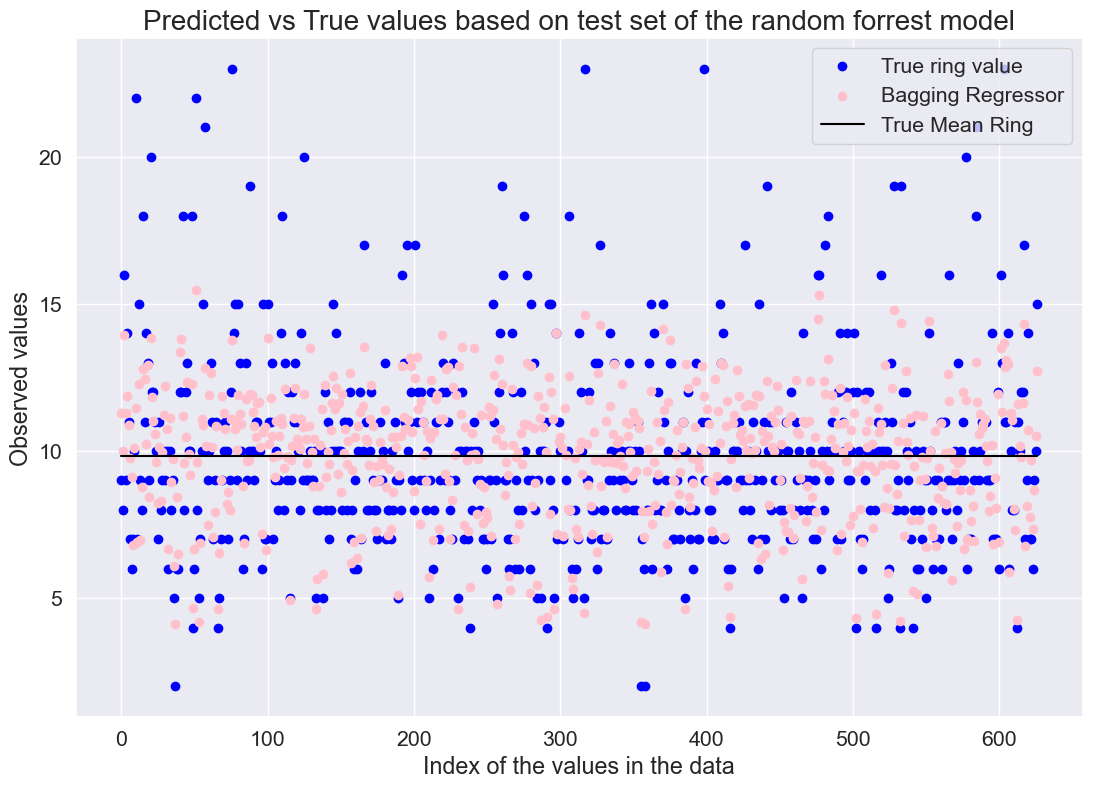

In [380]:
figure(figsize=(13, 9), dpi=100)
y_mean = [np.mean(predicted_bagging_reversed[:, -1])] * len(predicted_bagging_reversed[:, -1])
y_mean2 = [np.mean(test_abalone_reversed[:, -1].astype(int))] * len(test_abalone_reversed[:, -1])
plt.scatter(x, test_abalone_reversed[:, -1].astype(int), color='blue', label='True ring value')
plt.scatter(x, predicted_bagging_reversed[:, -1], color='pink', label='Bagging Regressor')

# Plot the average line
print('Difference in mean between predicted and true rings: ', (y_mean[0] - y_mean2[0])**2)

# Since the mean are very similar, we can just print one of them.
mean_line = plt.plot(x,y_mean, label='True Mean Ring', color='black')

plt.title('Predicted vs True values based on test set of the random forrest model', fontdict={'fontsize': 20})
plt.ylabel('Observed values')
plt.xlabel('Index of the values in the data')
plt.legend()
plt.show()

As shown above, the predicted values does not get strongly affected by the true values compared to the random forrest model. The higher and lower ring are much more closer to the mean value compared to the random forrest model.

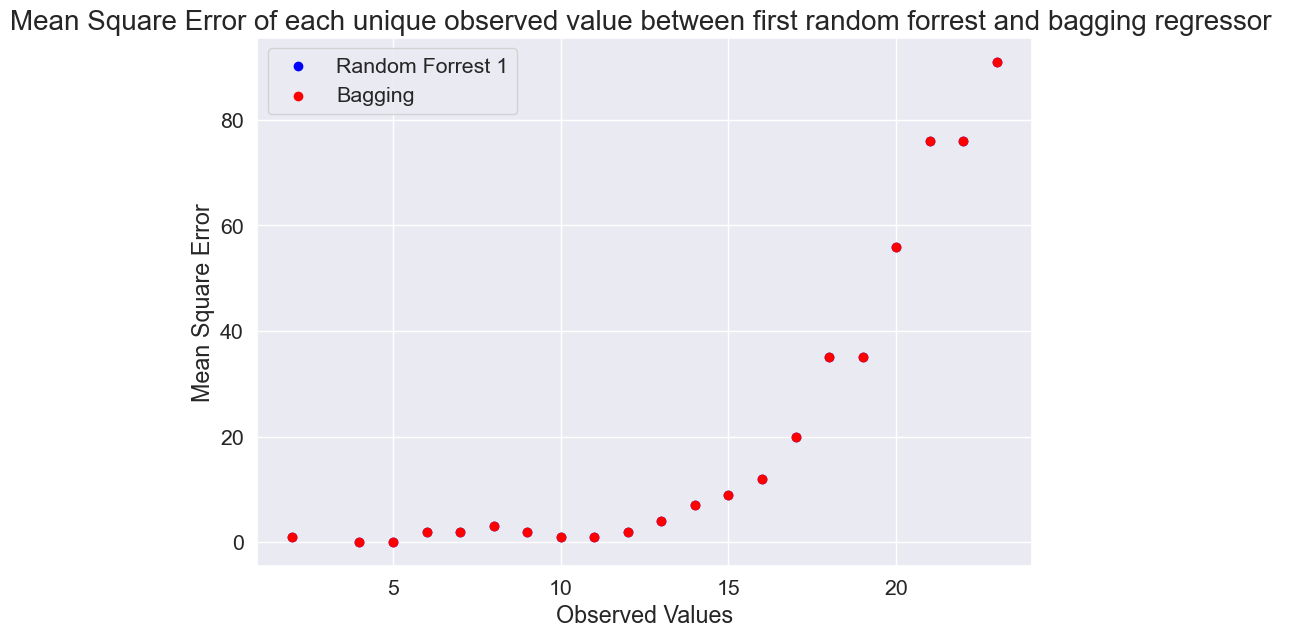

In [381]:
figure(figsize=(10, 7), dpi=100)
mean_errors_1 = mean_squared_error_unique(predicted_random_forrest_reversed[:, -1])
mean_errors_2 = mean_squared_error_unique(predicted_bagging_reversed[:, -1])
plt.scatter(mean_errors_1.keys(), mean_errors_1.values(), color='blue', label='Random Forrest 1')
plt.scatter(mean_errors_2.keys(), mean_errors_2.values(), color='red', label='Bagging')
plt.title('Mean Square Error of each unique observed value between first random forrest and bagging regressor ', fontdict={'fontsize': 20})
plt.ylabel('Mean Square Error')
plt.xlabel('Observed Values')
plt.legend()
plt.show()

The mean squared error from both the first random forrest and the bagging are the same as the red dots appears to overlap the blue dots.